<a href="https://colab.research.google.com/github/ariescacy9/trabajo_data_science_1/blob/main/proyecto_bloque1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DESARROLLO DEL PROYECTO FINAL - BOOTCAMP DE CIENCIA DE DATOS

El presente trabajo ha sido desarrollado en el entorno Python

## BLOQUE I


## 1). Entendimiento del caso

## Detalle del caso


 Se cuenta con la data del Instituto de Calidad del café hallado en el repositorio de GitHub (https://github.com/jldbc/coffee-quality-database/tree/master/data) sobre granos de café de la especie arábigos de distintas variedades, de distintos productores y organizaciones dedicadas al café desde diferentes orígenes. Se utilizó la variable “Total.Cup.Points” como Target que refiere al puntaje total del análisis sensorial realizado por expertos revisores de catación de café; y como variables predictoras detalles de análisis sensorial, método de proceso, tonalidad y variedad del café; y se procura realizar un modelo y entrenarlo para obtener una puntuación de calidad de cafes.

## Planteamiento del Problema

Debido a las puntuaciones existentes de cafés de especialidad (calidad internacional), los productores de café en los distintos paises deben obtener una puntuación superior a 85 puntos de análisis sensorial para considerarse dentro de esta categoría, es por ello necesario conocer las variables que tienen mayor impacto en la puntuación del café e identificar la fuerza de asociación estadística de variables predictoras con la variable objetivo para luego poder mejorar los procesos, llevándonos a la pregunta ¿Como poder predecir la puntuación total de rendimiento en taza de los granos de cafe?

## Objetivo

Crear un modelo predictivo capaz de predecir la puntuación total de rendimiento en taza de los granos de café considerados de calidad internacional basados en sus características.

## 2). Entendimiento de la Data

## Instalación de paquetes

In [1]:
#Instalando paquetes de lectura y análisis necesarios
import pandas as pd #para transformación de datos
import numpy as np #para operaciones de vectores o matrices
#Instalando Paquetes para gráficas
import matplotlib.pyplot as plt
import seaborn as sns
#Instalando Paquetes para train y test
from sklearn.model_selection import train_test_split # para partición de datos en train y test
#Instalando Paquetes de métricas de modelos
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score #métrica de presición
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve
from scipy import interp
#Instalando Paquetes de modelos
import lightgbm as lgb
import xgboost as xgb
!pip install catboost
from catboost import CatBoostClassifier, Pool
from sklearn.tree import DecisionTreeClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.2 MB/s eta 0:00:00


## Lectura de la Data

In [2]:
#Fijando el directorio de trabajo
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import os
os.chdir('/content/drive/MyDrive/base_de_datos')

In [4]:
os.getcwd()

'/content/drive/MyDrive/base_de_datos'

In [5]:
#Leyendo el archivo csv
data_cafe = pd.read_csv('/content/drive/MyDrive/base_de_datos/arabica_data_cleaned.csv', index_col=0, sep=',', encoding='latin-1')


In [6]:
#Mostrando los detalles de la data
data_cafe

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00
2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00
3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.00,1800.00,1700.00
4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.00,2200.00,2000.00
5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,Arabica,juan carlos garcia lopez,Mexico,el centenario,NaN,"la esperanza, municipio juchique de ferrer, ve...",1104328663,terra mia,900,juchique de ferrer,...,None,20,"September 17th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,900.00,900.00,900.00
1308,Arabica,myriam kaplan-pasternak,Haiti,200 farms,NaN,coeb koperativ ekselsyo basen (350 members),NaN,haiti coffee,~350m,"department d'artibonite , haiti",...,Blue-Green,16,"May 24th, 2013",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,350.00,350.00,350.00
1309,Arabica,"exportadora atlantic, s.a.",Nicaragua,finca las marÃ­as,017-053-0211/ 017-053-0212,beneficio atlantic condega,017-053-0211/ 017-053-0212,exportadora atlantic s.a,1100,jalapa,...,Green,5,"June 6th, 2018",Instituto HondureÃ±o del CafÃ©,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1100.00,1100.00,1100.00
1310,Arabica,juan luis alvarado romero,Guatemala,finca el limon,NaN,beneficio serben,11/853/165,unicafe,4650,nuevo oriente,...,Green,4,"May 24th, 2013",Asociacion Nacional Del CafÃ©,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,ft,1417.32,1417.32,1417.32


In [7]:
# visualizando el tamaño de filas y columnas
data_cafe.shape

(1311, 43)

In [8]:
#Mostrando todas las variables
data_cafe.columns

Index(['Species', 'Owner', 'Country.of.Origin', 'Farm.Name', 'Lot.Number',
       'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner', 'Harvest.Year',
       'Grading.Date', 'Owner.1', 'Variety', 'Processing.Method', 'Aroma',
       'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
       'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points',
       'Moisture', 'Category.One.Defects', 'Quakers', 'Color',
       'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

## Análisis previo de los datos

In [9]:
#PRE-ANÁLISIS DE LOS DATOS
#Mostrando valores únicos para la variables "Producer" -- cambiar lo que esta dentro de las comillas para visualizar el detalle de la variable que se desea mostrar
valores_unicos = data_cafe['Producer'].unique()
valores_unicos
#Donde se analizaron variables predictoras que tienen demasiadas categorías, las cuales se dejarán fuera del modelo, como 'Farm.Name', 'Mill', 'Owner', 'Producer', etc y tampoco se considera a 'Species' por tener tan solo un solo valor siendo de especie Arábigo, utilizada para el estudio.
#Variables como 'Certification.Address', 'Certification.Contact' se concluyo que no son útiles para el modelo

array(['METAD PLC', nan, 'Yidnekachew Dabessa Coffee Plantation', 'HVC',
       "Bazen Agricultural & Industrial Dev't Plc",
       'Diamond Enterprise Plc', 'Fahem Coffee Plantation',
       'Alfredo De JesÃºs LÃ³pez PÃ©rez', 'Jorge Walter Restrepo',
       'Robert, Sharon, Arianna Wood', 'MarÃ\xada Leticia Diosa',
       'P.T. Toarco Jaya', 'Green Gold Ethiopia | Phone: 0114342032',
       'Echo Coffee', 'LevelUp', 'NicolÃ¡s Rueda Urrego', 'SEVERAL',
       'ROBERTO LICONA FRANCO', 'Silvia Elena Higuita', 'Ralph Junqueira',
       'Kabum trading company', 'Reinerio Zepeda',
       'FANG,ZHENG-LUN æ\x96¹æ\x94¿å\x80«',
       'Homero Texeira de Macedo Junior', 'Exclusive Coffees S.A.',
       'Haider Abamecha Abadiko', 'Kangunu', 'Kona Pacific Farmers Co-Op',
       'Contact name | ATO Teshome Belamo', 'Hugo SepÃºlveda Montoya',
       'ITDP', 'Maria Rogeria Costa Pereira',
       'LIN YEN CHIEN æ\x9e\x97è¨\x80è¬\x99', 'JUNGLE ESTATE',
       'Kaasay Farmer Group', 'Kawacom',
       'S

In [10]:
# Seleccionando las variables numéricas
numeric_columns = data_cafe.select_dtypes(include=['number'])

# Seleccionar las variables no numéricas o categóricas
non_numeric_columns = data_cafe.select_dtypes(exclude=['number'])

# Aplicar describe() a las variables numéricas
numeric_description = numeric_columns.describe()

# Aplicar describe() a las variables no numéricas o categóricas
non_numeric_description = non_numeric_columns.describe()

In [11]:
numeric_description.head(10)

,Number.of.Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.00000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1310.000000,1311.000000,1084.000000,1084.000000,1084.000000
mean,153.887872,7.563806,7.518070,7.397696,7.533112,7.517727,7.517506,9.833394,9.83312,9.903272,7.497864,82.115927,0.088863,0.426392,0.177099,3.591915,1759.548954,1808.843803,1784.196379
std,129.733734,0.378666,0.399979,0.405119,0.381599,0.359213,0.406316,0.559343,0.77135,0.530832,0.474610,3.515761,0.047957,1.832415,0.840583,5.350371,8767.847252,8767.187498,8767.016913
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,14.500000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.00000,10.000000,7.250000,81.170000,0.090000,0.000000,0.000000,0.000000,1100.000000,1100.000000,1100.000000
50%,175.000000,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,10.00000,10.000000,7.500000,82.500000,0.110000,0.000000,0.000000,2.000000,1310.640000,1350.000000,1310.640000
75%,275.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.00000,10.000000,7.750000,83.670000,0.120000,0.000000,0.000000,4.000000,1600.000000,1650.000000,1600.000000
max,1062.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.00000,10.000000,10.000000,90.580000,0.280000,31.000000,11.000000,55.000000,190164.000000,190164.000000,190164.000000


Interpretando: el n° de bolsas promedio de café exportado es de 153.9 kg. Respecto a las características de sensibilidad del café importado tenemos que el aroma (Aroma) tuvo un puntaje promedio de los expertos catadores de 7.6, el sabor (flavor) de 7.5, en postgusto (aftertaste) de 7.4, en acidez (Acidity) de 7.5, en cuerpo (Body) de 7.5, en equilibrio (Balance) de 7.5, en uniformidad (Uniformity) de 9.8, en taza limpia (Clean.Cup) de 9.8, en dulzura (Sweetness) de 9.9, con un puntaje promedio en sensibilidad del equipo catador (Cupper.Points) de 7.5

In [12]:
non_numeric_description.head(10)

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Grading.Date,Owner.1,Variety,Processing.Method,Color,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement
count,1311,1304,1310,955,270,1001,1165,1102,1088,1254,...,1311,1304,1110,1159,1095,1311,1311,1311,1311,1311
unique,1,305,36,557,221,447,841,270,383,343,...,558,309,29,5,4,557,26,30,27,2
top,Arabica,juan luis alvarado romero,Mexico,various,1,beneficio ixchel,0,"unex guatemala, s.a.",1100,huila,...,"July 11th, 2012",Juan Luis Alvarado Romero,Caturra,Washed / Wet,Green,"July 11th, 2013",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m
freq,1311,155,236,47,18,90,67,86,43,112,...,25,155,256,812,850,25,295,293,295,1129


Interpretando: de las descripciones de las variables no numericas podemos observar que existen algunas que tienen numerosas categorías tal como mencionamos anteriormente; lo cual sería complejo manejarlas en un modelo, las pondremos en observación y analizaremos posteriormente si es posible reclasificarlos, las variables son: "Owner", "Farm.Name", "Lot.Number", "Mill", "ICO.Number", "Company", "Altitude", "Region", "Producer", "Grading.Date", "Owner.1", "Expiration"

In [13]:
#Mostrando los valores Nulos y sus porcentajes por cada variable predictora incluyendo la variable Target
#nulos= data_cafe.isnull().sum()
# Calcula el porcentaje de valores nulos
nulos = data_cafe.isnull().mean() * 100
# Para imprimir todo el DataFrame en la consola:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(nulos.sort_values(ascending=False))
#Se aprecia que por ejemplo la variable predictora Lot. Number tiene un porcentaje alto de varlores perdidos, por lo que no se considerarà para el modelo

Lot.Number               79.405034
Farm.Name                27.154844
Mill                     23.646072
Producer                 17.543860
altitude_mean_meters     17.315027
altitude_high_meters     17.315027
altitude_low_meters      17.315027
Altitude                 17.009916
Color                    16.475973
Company                  15.942029
Variety                  15.331808
Processing.Method        11.594203
ICO.Number               11.136537
Region                    4.347826
Harvest.Year              3.585050
Owner.1                   0.533944
Owner                     0.533944
Country.of.Origin         0.076278
Quakers                   0.076278
Certification.Contact     0.000000
Total.Cup.Points          0.000000
unit_of_measurement       0.000000
Certification.Address     0.000000
Certification.Body        0.000000
Expiration                0.000000
Category.Two.Defects      0.000000
Category.One.Defects      0.000000
Moisture                  0.000000
Species             

In [14]:
# vizualizando la cantidad de datos por su contenido, cambiar lo que esta dentro de las comillas para visualizar el detalle de la variable que se desea mostrar
lista_contenido = data_cafe["Owner"].value_counts()
lista_contenido

juan luis alvarado romero           155
racafe & cia s.c.a                   60
exportadora de cafe condor s.a       54
kona pacific farmers cooperative     52
ipanema coffees                      50
                                   ... 
coffee export                         1
romulo bello flores                   1
rachel peterson                       1
josÃ© luis rojas yeo                  1
juan carlos garcia lopez              1
Name: Owner, Length: 305, dtype: int64

In [15]:
# Solamente para listar paises de origen e inferir en la calidad de procedencia
unicos = data_cafe["Country.of.Origin"].unique()
unicos

array(['Ethiopia', 'Guatemala', 'Brazil', 'Peru', 'United States',
       'United States (Hawaii)', 'Indonesia', 'China', 'Costa Rica',
       'Mexico', 'Uganda', 'Honduras', 'Taiwan', 'Nicaragua',
       'Tanzania, United Republic Of', 'Kenya', 'Thailand', 'Colombia',
       'Panama', 'Papua New Guinea', 'El Salvador', 'Japan', 'Ecuador',
       'United States (Puerto Rico)', 'Haiti', 'Burundi', 'Vietnam',
       'Philippines', 'Rwanda', 'Malawi', 'Laos', 'Zambia', 'Myanmar',
       'Mauritius', 'Cote d?Ivoire', nan, 'India'], dtype=object)

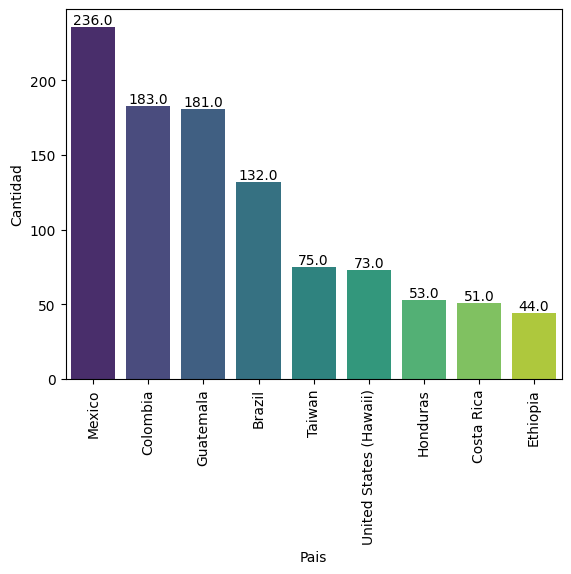

In [16]:
# Mostrando la cantidad de lotes de café por pais
conteo = data_cafe['Country.of.Origin'].value_counts()

# Convertir la serie en un DataFrame y reiniciar el índice
df_paises = conteo.reset_index()

# Renombrar las columnas
df_paises = df_paises.rename(columns={'index': 'Pais', 'Country.of.Origin': 'Cantidad'})
df_paises

# cantidad de nulos
#nulos= data_cafe_variables.isnull().sum()


# graficar
ax=sns.barplot(x='Pais', y='Cantidad', data=df_paises[:9],palette="viridis")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center',
                va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')
plt.show()


## 3). Análisis Exploratorio

In [17]:
#Separando variables para predecir la puntuación total de rendimiento en taza de los granos de café considerados de calidad internacional basados en sus características.
data_cafe_variables= data_cafe[["Aroma","Flavor","Aftertaste","Acidity","Body","Balance","Uniformity","Cupper.Points","Clean.Cup"
  ,"Moisture","Color","Processing.Method","Variety","Total.Cup.Points"]]
data_cafe_variables

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Cupper.Points,Clean.Cup,Moisture,Color,Processing.Method,Variety,Total.Cup.Points
1,8.67,8.83,8.67,8.75,8.50,8.42,10.00,8.75,10.00,0.12,Green,Washed / Wet,NaN,90.58
2,8.75,8.67,8.50,8.58,8.42,8.42,10.00,8.58,10.00,0.12,Green,Washed / Wet,Other,89.92
3,8.42,8.50,8.42,8.42,8.33,8.42,10.00,9.25,10.00,0.00,NaN,NaN,Bourbon,89.75
4,8.17,8.58,8.42,8.42,8.50,8.25,10.00,8.67,10.00,0.11,Green,Natural / Dry,NaN,89.00
5,8.25,8.50,8.25,8.50,8.42,8.33,10.00,8.58,10.00,0.12,Green,Washed / Wet,Other,88.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,7.08,6.83,6.25,7.42,7.25,6.75,10.00,6.75,0.00,0.11,None,Washed / Wet,Bourbon,68.33
1308,6.75,6.58,6.42,6.67,7.08,6.67,9.33,6.42,6.00,0.14,Blue-Green,Natural / Dry,Typica,67.92
1309,7.25,6.58,6.33,6.25,6.42,6.08,6.00,6.17,6.00,0.13,Green,Other,Caturra,63.08
1310,7.50,6.67,6.67,7.67,7.33,6.67,8.00,6.67,1.33,0.10,Green,Washed / Wet,Catuai,59.83


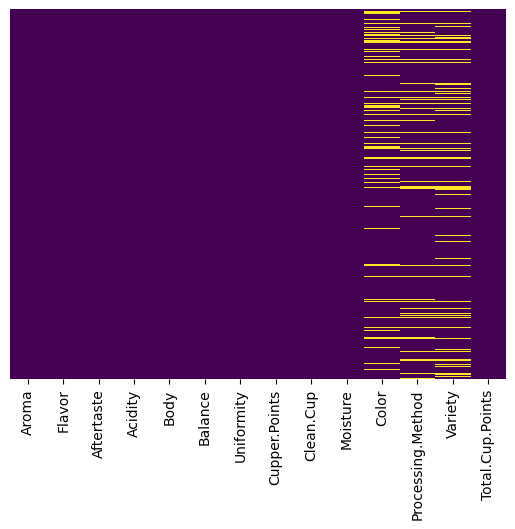

In [18]:
#Graficando los valores Nulos por variable sobre la data "data_cafe_variables"
sns.heatmap(data_cafe_variables.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [19]:
#Revisando la información de los datos "arabica_data_cleaned.csv"
print(len(data_cafe_variables.columns))
data_cafe_variables.info()
#La data tiene 43 características, y Se muestran elementos nulos, y se muestran tipo de datos por cada variable

14
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1311 entries, 1 to 1312
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Aroma              1311 non-null   float64
 1   Flavor             1311 non-null   float64
 2   Aftertaste         1311 non-null   float64
 3   Acidity            1311 non-null   float64
 4   Body               1311 non-null   float64
 5   Balance            1311 non-null   float64
 6   Uniformity         1311 non-null   float64
 7   Cupper.Points      1311 non-null   float64
 8   Clean.Cup          1311 non-null   float64
 9   Moisture           1311 non-null   float64
 10  Color              1095 non-null   object 
 11  Processing.Method  1159 non-null   object 
 12  Variety            1110 non-null   object 
 13  Total.Cup.Points   1311 non-null   float64
dtypes: float64(11), object(3)
memory usage: 153.6+ KB


In [20]:
#Visualizando los porcetanjes de los valores Nulos por cada variable
#print(data_cafe_variables.isnull().sum())
# Calcula el porcentaje de valores nulos
nulos = data_cafe_variables.isnull().mean() * 100
# Para imprimir todo el DataFrame en la consola:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(nulos.sort_values(ascending=False))

Color                16.475973
Variety              15.331808
Processing.Method    11.594203
Aroma                 0.000000
Flavor                0.000000
Aftertaste            0.000000
Acidity               0.000000
Body                  0.000000
Balance               0.000000
Uniformity            0.000000
Cupper.Points         0.000000
Clean.Cup             0.000000
Moisture              0.000000
Total.Cup.Points      0.000000
dtype: float64


<Axes: ylabel='Total.Cup.Points'>

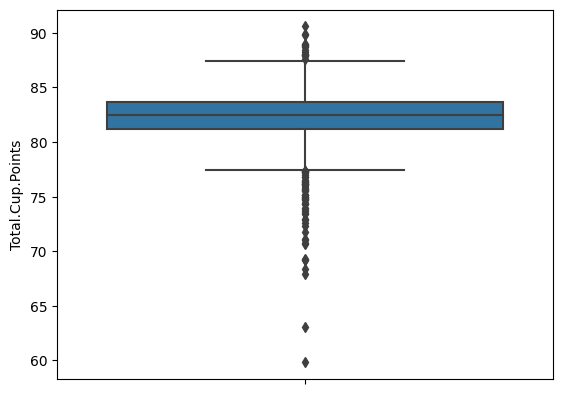

In [21]:
# muestra el target quitando el dato atípico de valor cero
#data_cafe_variables["Total.Cup.Points"]
data_cafe_variables = data_cafe_variables[data_cafe_variables['Total.Cup.Points']!=0]
sns.boxplot( y='Total.Cup.Points', data=data_cafe_variables)

In [22]:
# mostrando información estadística de la variable TARGET
data_cafe_variables['Total.Cup.Points'].describe()

count    1310.000000
mean       82.178611
std         2.686039
min        59.830000
25%        81.170000
50%        82.500000
75%        83.670000
max        90.580000
Name: Total.Cup.Points, dtype: float64

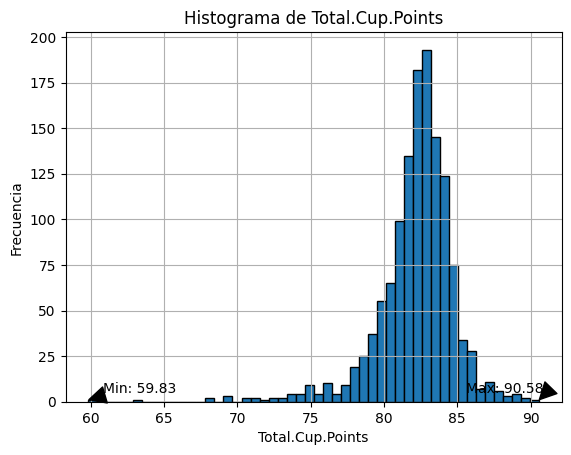

In [23]:
# Creando un histograma con 10 bins de la Variable TARGET
plt.hist(data_cafe_variables['Total.Cup.Points'], bins=50, edgecolor='k')
plt.xlabel('Total.Cup.Points')
plt.ylabel('Frecuencia')
plt.title('Histograma de Total.Cup.Points')
plt.grid(True)

# Calcular los valores mínimo y máximo
min_value = data_cafe_variables['Total.Cup.Points'].min()
max_value = data_cafe_variables['Total.Cup.Points'].max()

# Agregar etiquetas para los valores mínimo y máximo
plt.annotate(f'Min: {min_value}', xy=(min_value, 1), xytext=(min_value + 1, 5),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate(f'Max: {max_value}', xy=(max_value, 1), xytext=(max_value - 5, 5),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Mostrar el histograma
plt.show()

In [24]:
# muestra las variables del dataframe elegidos
data_cafe_variables

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Cupper.Points,Clean.Cup,Moisture,Color,Processing.Method,Variety,Total.Cup.Points
1,8.67,8.83,8.67,8.75,8.50,8.42,10.00,8.75,10.00,0.12,Green,Washed / Wet,NaN,90.58
2,8.75,8.67,8.50,8.58,8.42,8.42,10.00,8.58,10.00,0.12,Green,Washed / Wet,Other,89.92
3,8.42,8.50,8.42,8.42,8.33,8.42,10.00,9.25,10.00,0.00,NaN,NaN,Bourbon,89.75
4,8.17,8.58,8.42,8.42,8.50,8.25,10.00,8.67,10.00,0.11,Green,Natural / Dry,NaN,89.00
5,8.25,8.50,8.25,8.50,8.42,8.33,10.00,8.58,10.00,0.12,Green,Washed / Wet,Other,88.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,7.00,6.33,6.17,6.50,6.67,6.17,8.00,6.33,8.00,0.10,Green,Washed / Wet,Catuai,69.17
1307,7.08,6.83,6.25,7.42,7.25,6.75,10.00,6.75,0.00,0.11,None,Washed / Wet,Bourbon,68.33
1308,6.75,6.58,6.42,6.67,7.08,6.67,9.33,6.42,6.00,0.14,Blue-Green,Natural / Dry,Typica,67.92
1309,7.25,6.58,6.33,6.25,6.42,6.08,6.00,6.17,6.00,0.13,Green,Other,Caturra,63.08


In [25]:
# Seleccionar las variables numéricas
numeric_columns = data_cafe_variables.select_dtypes(include=['number'])

# Seleccionar las variables no numéricas
non_numeric_columns = data_cafe_variables.select_dtypes(exclude=['number'])

# Aplicar describe() a las variables numéricas
numeric_description = numeric_columns.describe()

# Aplicar describe() a las variables no numéricas
non_numeric_description = non_numeric_columns.describe()

In [26]:
data_cafe_variables.shape

(1310, 14)

In [27]:
# Estadística descriptiva de la variables numéricas elegidas
numeric_description.head(10)

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Cupper.Points,Clean.Cup,Moisture,Total.Cup.Points
count,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000
mean,7.569580,7.523809,7.403344,7.538863,7.523466,7.523244,9.840901,7.503588,9.840626,0.088840,82.178611
std,0.315845,0.341897,0.349867,0.319912,0.293129,0.349304,0.489058,0.427138,0.722158,0.047967,2.686039
min,5.080000,6.080000,6.170000,5.250000,5.250000,6.080000,6.000000,5.170000,0.000000,0.000000,59.830000
25%,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,7.250000,10.000000,0.090000,81.170000
50%,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,7.500000,10.000000,0.110000,82.500000
75%,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,7.750000,10.000000,0.120000,83.670000
max,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,0.280000,90.580000


In [28]:
# Estadística descriptiva de la variables categóricas elegidas
non_numeric_description.head(10)

,Color,Processing.Method,Variety
count,1094,1159,1109
unique,4,5,29
top,Green,Washed / Wet,Caturra
freq,849,812,255


## 3.1). Exploración de las Variables numéricas Seleccionadas para el modelo

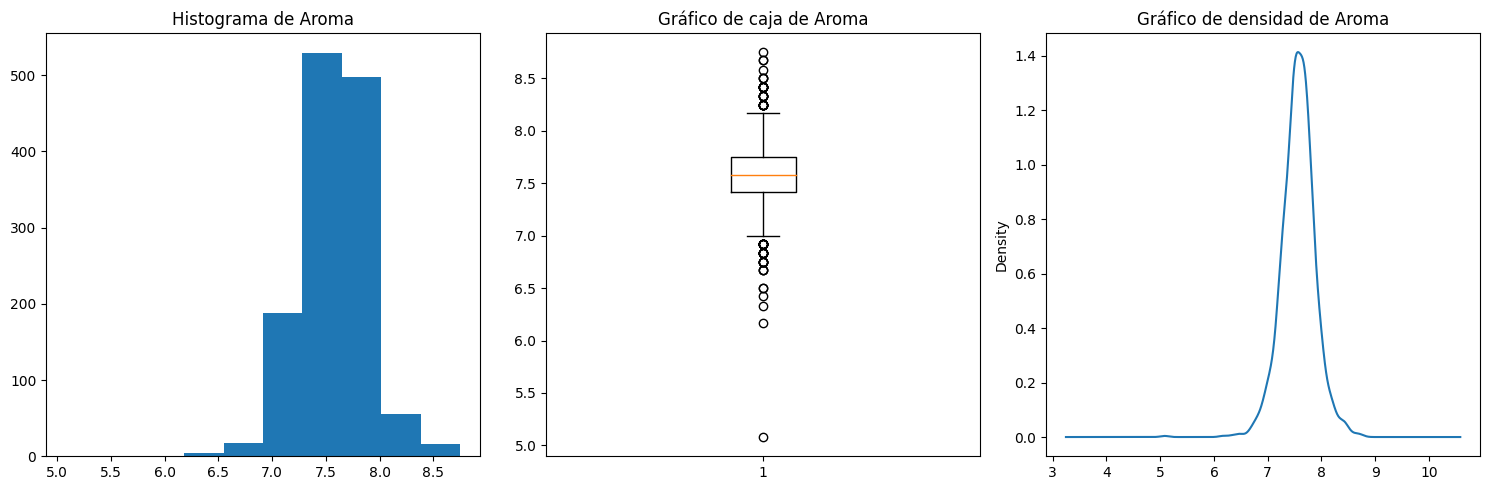

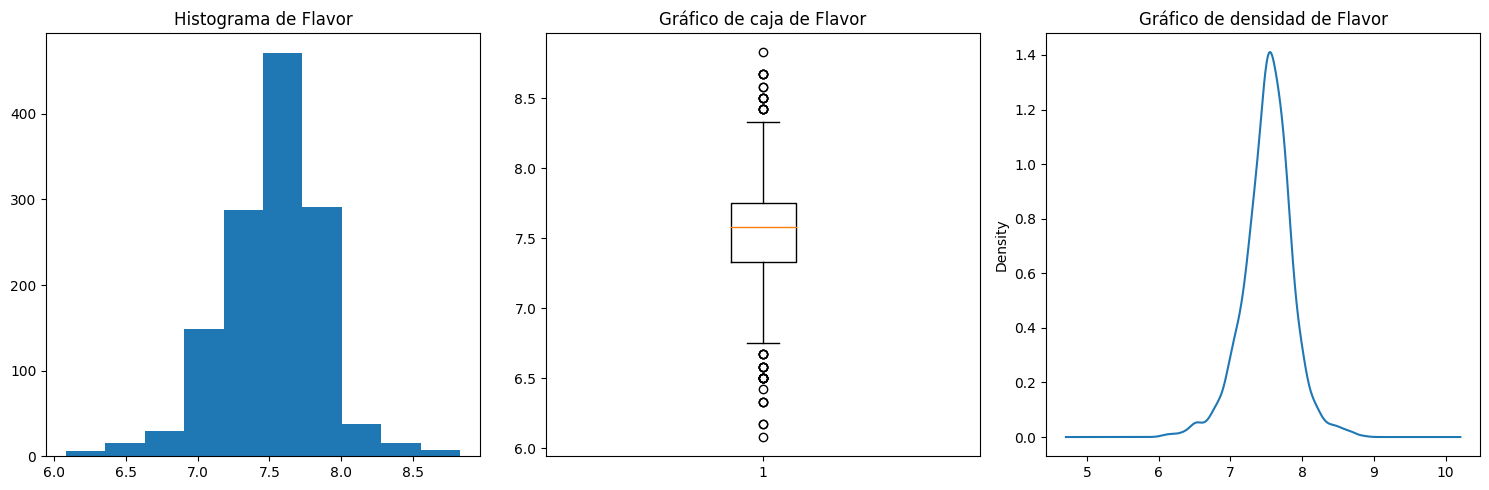

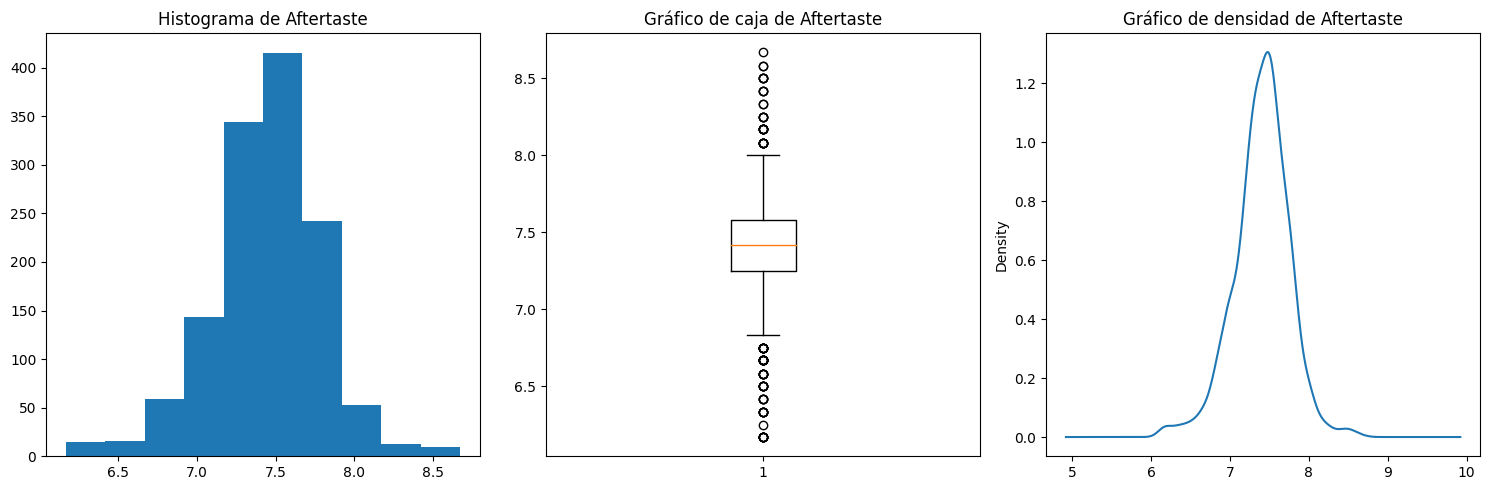

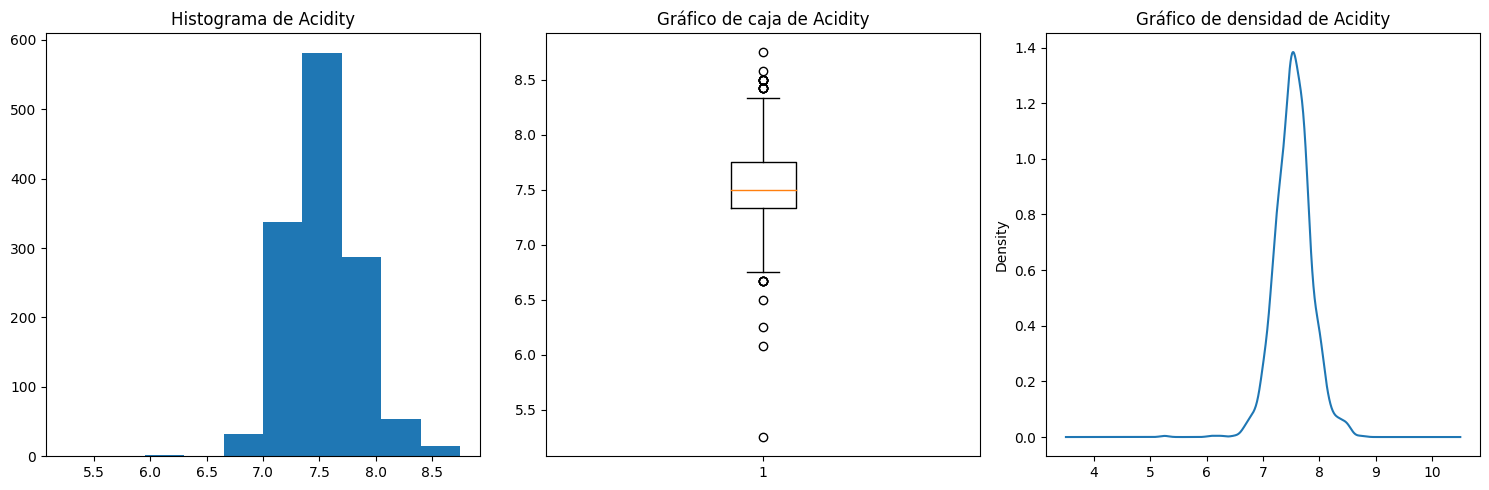

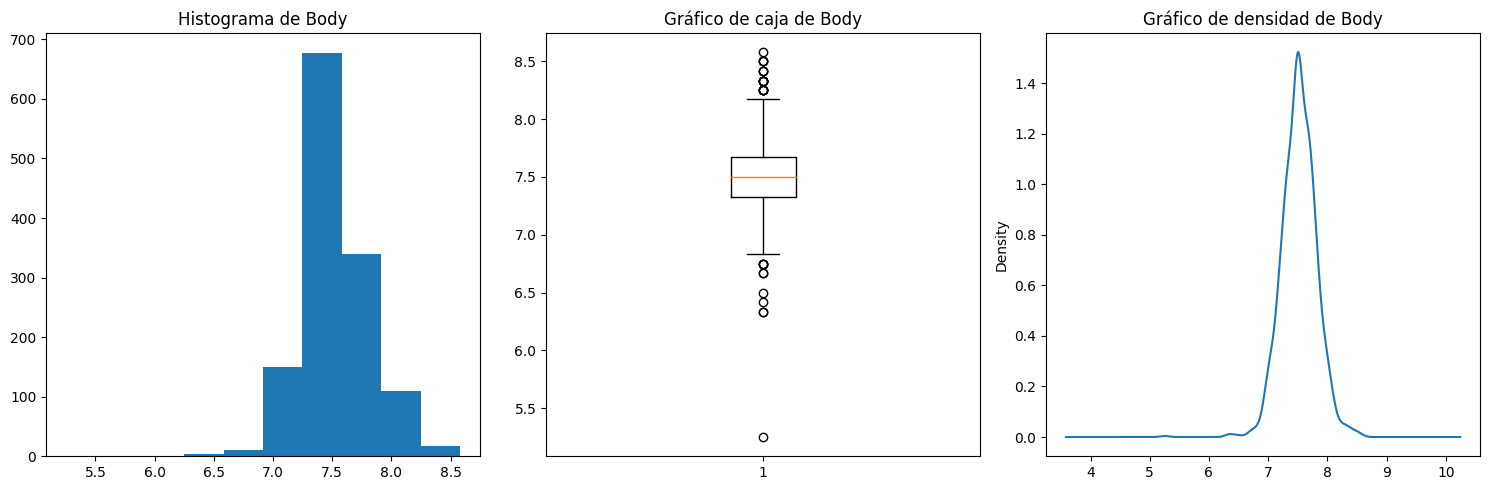

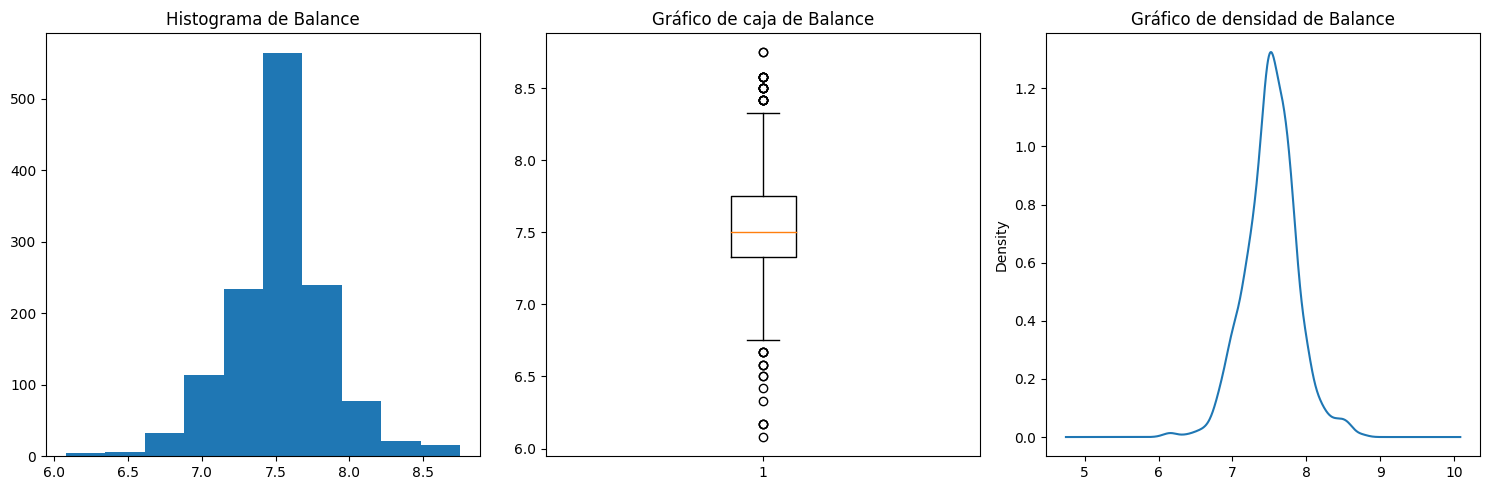

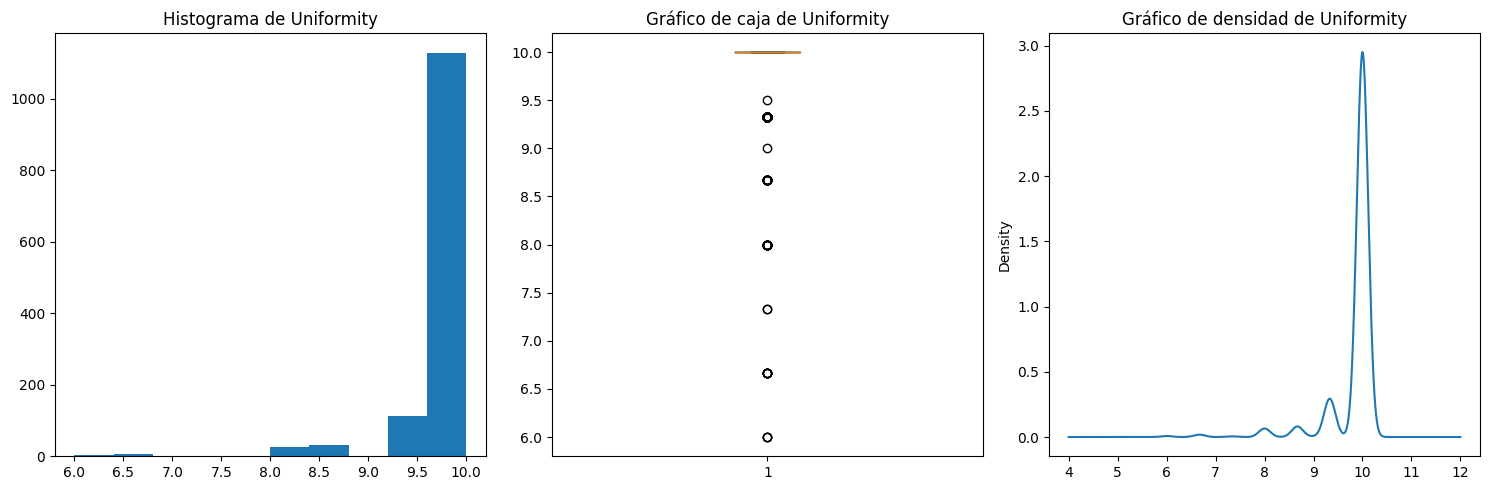

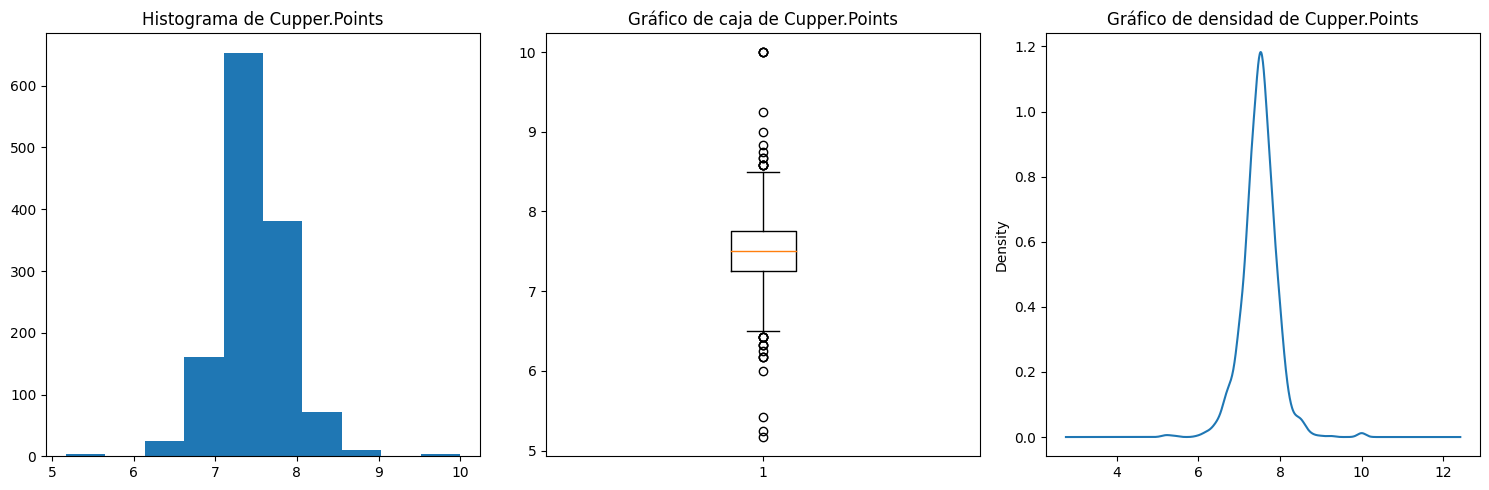

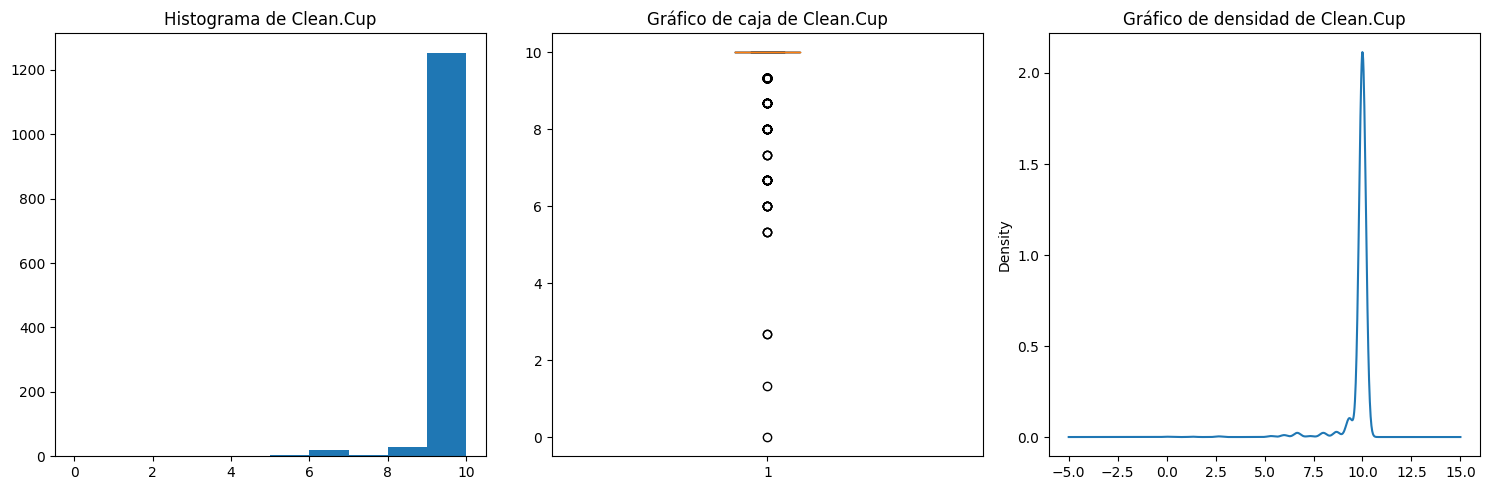

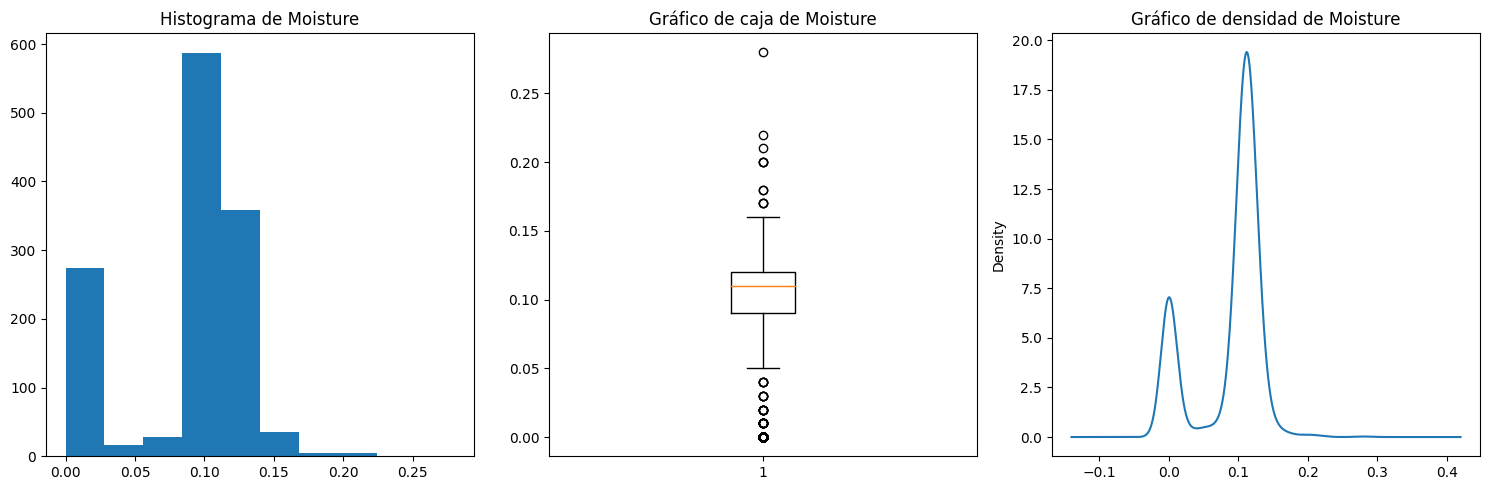

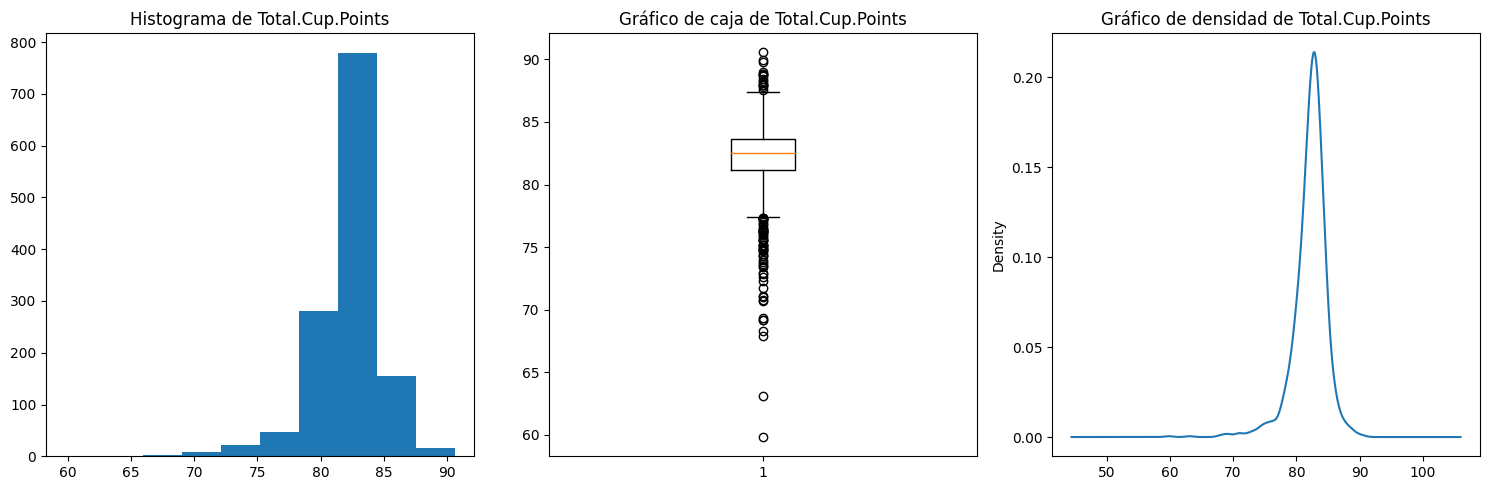

In [29]:
# Iterando sobre las variables numéricas
for var in numeric_columns.columns:

    # Creando una figura con una grilla de 1 fila y 3 columnas
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Histograma
    axes[0].hist(numeric_columns[var])
    axes[0].set_title(f'Histograma de {var}')

    # Gráfico de caja
    axes[1].boxplot(numeric_columns[var])
    axes[1].set_title(f'Gráfico de caja de {var}')

    # Gráfico de densidad
    numeric_columns[var].plot.density(ax=axes[2])
    axes[2].set_title(f'Gráfico de densidad de {var}')

    # Ajustar el diseño de la figura
    plt.tight_layout()

    # Mostrar la figura
    plt.show()

## 3.2). Exploración de las Variables No numéricas Seleccionadas para el modelo

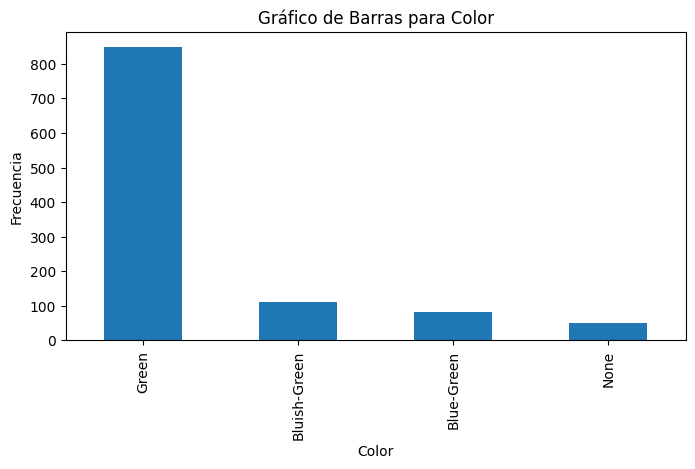

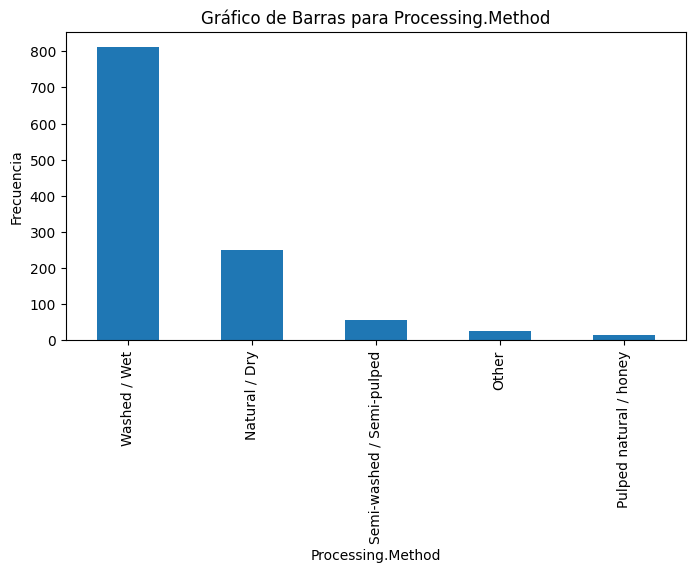

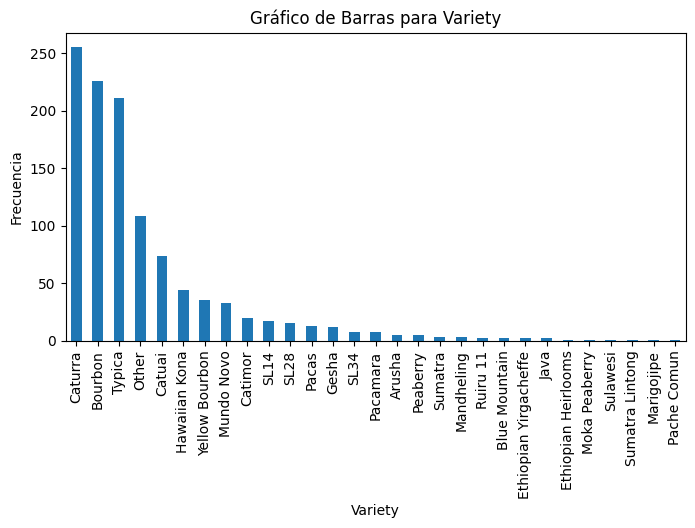

In [30]:
# Itera a través de las columnas categóricas
for columna in non_numeric_columns.columns:
    # Cuenta las ocurrencias de cada categoría
    counts = non_numeric_columns[columna].value_counts()

    # Crea un gráfico de barras
    plt.figure(figsize=(8, 4))  # Ajusta el tamaño de la figura según tus preferencias
    counts.plot(kind='bar')

    # Configura las etiquetas y título
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.title(f'Gráfico de Barras para {columna}')

    # Muestra el gráfico
    plt.show()


In [31]:
#Analizando las variables categóricas
#Variable "variedad"

lista_contenido = data_cafe_variables["Variety"].value_counts()
lista_contenido


Caturra                  255
Bourbon                  226
Typica                   211
Other                    108
Catuai                    74
Hawaiian Kona             44
Yellow Bourbon            35
Mundo Novo                33
Catimor                   20
SL14                      17
SL28                      15
Pacas                     13
Gesha                     12
SL34                       8
Pacamara                   8
Arusha                     5
Peaberry                   5
Sumatra                    3
Mandheling                 3
Ruiru 11                   2
Blue Mountain              2
Ethiopian Yirgacheffe      2
Java                       2
Ethiopian Heirlooms        1
Moka Peaberry              1
Sulawesi                   1
Sumatra Lintong            1
Marigojipe                 1
Pache Comun                1
Name: Variety, dtype: int64

## 4). Transformación de Variables Categóricas

In [34]:
# Imputamos los datos nulos de la variable VARIEDAD
data_cafe_variables['Color']=data_cafe_variables['Color'].fillna('None')
data_cafe_variables.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1310 entries, 1 to 1310
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Aroma              1310 non-null   float64
 1   Flavor             1310 non-null   float64
 2   Aftertaste         1310 non-null   float64
 3   Acidity            1310 non-null   float64
 4   Body               1310 non-null   float64
 5   Balance            1310 non-null   float64
 6   Uniformity         1310 non-null   float64
 7   Cupper.Points      1310 non-null   float64
 8   Clean.Cup          1310 non-null   float64
 9   Moisture           1310 non-null   float64
 10  Color              1310 non-null   object 
 11  Processing.Method  1159 non-null   object 
 12  Variety            1109 non-null   object 
 13  Total.Cup.Points   1310 non-null   float64
dtypes: float64(11), object(3)
memory usage: 153.5+ KB


<ipython-input-34-ab7b4aed3994>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cafe_variables['Color']=data_cafe_variables['Color'].fillna('None')


In [35]:
#convertiendo las variables categoricas "VARIEDAD" a variable numérica
# Definir la función de mapeo
def convertir_variedad(valor):
    if valor == 'Caturra':
        return 1
    elif valor == 'Bourbon':
        return 2
    elif valor == 'Typica':
        return 3
    else:
        return 0

# Aplicar la función a cada elemento del DataFrame
data_cafe_variables['Variety'] = data_cafe_variables['Variety'].apply(convertir_variedad)
data_cafe_variables['Variety'].value_counts()

<ipython-input-35-b7e73396dd1f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cafe_variables['Variety'] = data_cafe_variables['Variety'].apply(convertir_variedad)


0    618
1    255
2    226
3    211
Name: Variety, dtype: int64

In [36]:
#Mostrando el detalle de las variable categòrica "COLOR"

lista_contenido = data_cafe_variables["Color"].value_counts()
lista_contenido

Green           849
None            267
Bluish-Green    112
Blue-Green       82
Name: Color, dtype: int64

In [37]:
#convertir las variable categórica COLOR a variable numérica
# Definir la función de mapeo
def convertir_color(valor):
    if valor == 'Green':
        return 1
    elif valor == 'Bluish-Green':
        return 2
    elif valor == 'Blue-Green':
        return 3
    else:
        return 0

# Aplicar la función a cada elemento del DataFrame
data_cafe_variables['Color'] = data_cafe_variables['Color'].apply(convertir_color)
data_cafe_variables['Color'].value_counts()

<ipython-input-37-3d00fa65fbe3>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cafe_variables['Color'] = data_cafe_variables['Color'].apply(convertir_color)


1    849
0    267
2    112
3     82
Name: Color, dtype: int64

In [38]:
#Analizando las variable categórica "MÉTODO DE PROCESO"

lista_contenido = data_cafe_variables["Processing.Method"].value_counts()
lista_contenido

Washed / Wet                 812
Natural / Dry                251
Semi-washed / Semi-pulped     56
Other                         26
Pulped natural / honey        14
Name: Processing.Method, dtype: int64

In [39]:
# Imputamos los datos nulos de la variable METODO_PROCESO
data_cafe_variables['Processing.Method']=data_cafe_variables['Processing.Method'].fillna('Other')
data_cafe_variables.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1310 entries, 1 to 1310
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Aroma              1310 non-null   float64
 1   Flavor             1310 non-null   float64
 2   Aftertaste         1310 non-null   float64
 3   Acidity            1310 non-null   float64
 4   Body               1310 non-null   float64
 5   Balance            1310 non-null   float64
 6   Uniformity         1310 non-null   float64
 7   Cupper.Points      1310 non-null   float64
 8   Clean.Cup          1310 non-null   float64
 9   Moisture           1310 non-null   float64
 10  Color              1310 non-null   int64  
 11  Processing.Method  1310 non-null   object 
 12  Variety            1310 non-null   int64  
 13  Total.Cup.Points   1310 non-null   float64
dtypes: float64(11), int64(2), object(1)
memory usage: 153.5+ KB


<ipython-input-39-f57c3615f10e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cafe_variables['Processing.Method']=data_cafe_variables['Processing.Method'].fillna('Other')


In [40]:
#convertir las variable categórica ¨Método de proceso¨
# Definir la función de mapeo
def convertir_proceso(valor):
    if valor == 'Washed / Wet':
        return 1
    elif valor == 'Natural / Dry':
        return 2
    elif valor == 'Semi-washed / Semi-pulped':
        return 3
    elif valor == 'Pulped natural / honey':
        return 4
    else:
        return 0

# Aplicar la función a cada elemento del DataFrame
data_cafe_variables['Processing.Method'] = data_cafe_variables['Processing.Method'].apply(convertir_proceso)
data_cafe_variables['Processing.Method'].value_counts()

<ipython-input-40-f43d4bdc3cc4>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cafe_variables['Processing.Method'] = data_cafe_variables['Processing.Method'].apply(convertir_proceso)


1    812
2    251
0    177
3     56
4     14
Name: Processing.Method, dtype: int64


## 5). Análisis de Correlación


In [41]:
#remonbrando las columnas para su mejor interpretación
variables_español = ['Aroma','Sabor','Postgusto','Acidez','Cuerpo','Balance','Uniformidad','Puntos_Catador','Taza_limpia','Humedad', 'Color','Metodo_proceso','variedad','Puntaje_Total_Catación']
data_cafe_variables.columns = variables_español
data_cafe_variables


,Aroma,Sabor,Postgusto,Acidez,Cuerpo,Balance,Uniformidad,Puntos_Catador,Taza_limpia,Humedad,Color,Metodo_proceso,variedad,Puntaje_Total_Catación
1,8.67,8.83,8.67,8.75,8.50,8.42,10.00,8.75,10.00,0.12,1,1,0,90.58
2,8.75,8.67,8.50,8.58,8.42,8.42,10.00,8.58,10.00,0.12,1,1,0,89.92
3,8.42,8.50,8.42,8.42,8.33,8.42,10.00,9.25,10.00,0.00,0,0,2,89.75
4,8.17,8.58,8.42,8.42,8.50,8.25,10.00,8.67,10.00,0.11,1,2,0,89.00
5,8.25,8.50,8.25,8.50,8.42,8.33,10.00,8.58,10.00,0.12,1,1,0,88.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,7.00,6.33,6.17,6.50,6.67,6.17,8.00,6.33,8.00,0.10,1,1,0,69.17
1307,7.08,6.83,6.25,7.42,7.25,6.75,10.00,6.75,0.00,0.11,0,1,2,68.33
1308,6.75,6.58,6.42,6.67,7.08,6.67,9.33,6.42,6.00,0.14,3,2,3,67.92
1309,7.25,6.58,6.33,6.25,6.42,6.08,6.00,6.17,6.00,0.13,1,0,1,63.08


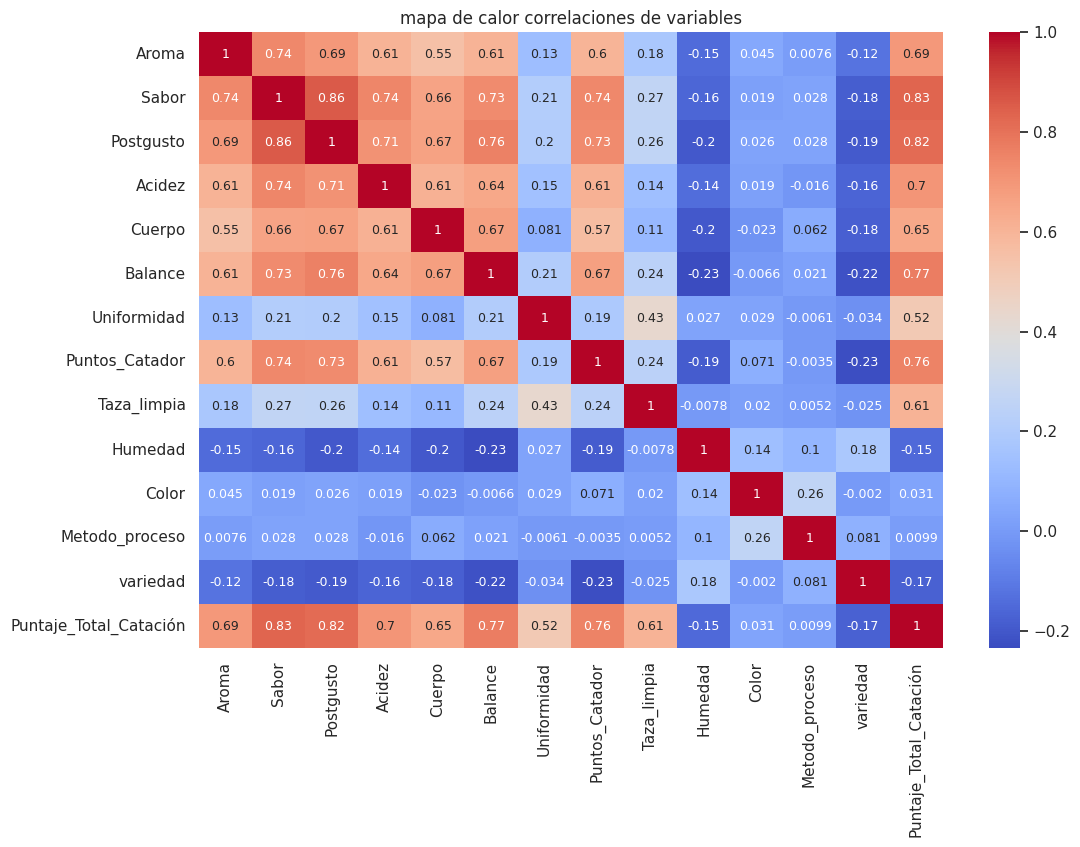

In [42]:
#Mostramos el mapa de calor segùn la correlación de las variables predictoras con la variable TARGET
sns.set(font_scale=1)
correlacion = data_cafe_variables.corr()
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(correlacion, annot=True,annot_kws={"size": 9}, cmap = 'coolwarm')
plt.title('mapa de calor correlaciones de variables')
plt.show()

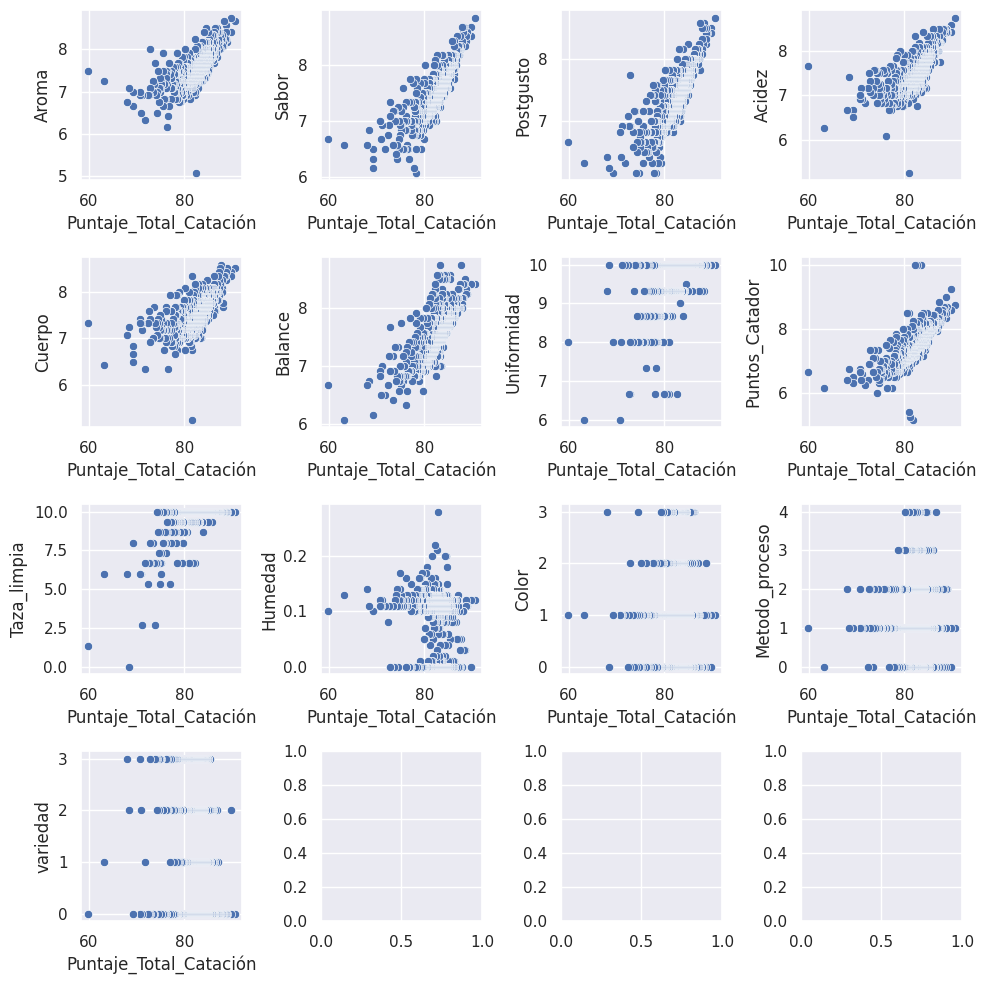

In [43]:
#graficando la correlacion de cada variable predictora con la variable TARGET
lista_variables = data_cafe_variables.columns.tolist()
lista_variables.remove('Puntaje_Total_Catación')

fig, axs = plt.subplots(4, 4, figsize=(10, 10))

for i, var in enumerate(lista_variables):
    row = i // 4
    col = i % 4
    sns.scatterplot(data=data_cafe_variables, x='Puntaje_Total_Catación', y=var, ax=axs[row, col])

plt.tight_layout()
plt.show()


## 6). Modelamiento de Datos

In [44]:
# separamos la data en features (X) and target (y)
X = data_cafe_variables.drop('Puntaje_Total_Catación', axis=1)
y = data_cafe_variables['Puntaje_Total_Catación']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #la data se ha distribuido en 70% para el entrenamiento y 30% para la prueba

In [45]:
# Mostrando la data de entrenamiento de las variables predictoras
X_train

,Aroma,Sabor,Postgusto,Acidez,Cuerpo,Balance,Uniformidad,Puntos_Catador,Taza_limpia,Humedad,Color,Metodo_proceso,variedad
866,7.42,7.50,7.33,7.58,7.33,7.33,10.00,7.25,10.00,0.11,1,1,3
553,7.83,7.67,7.42,7.42,7.50,7.58,10.00,7.50,10.00,0.11,1,1,0
31,7.92,8.25,8.00,8.33,8.00,8.08,10.00,8.00,10.00,0.08,0,0,0
86,7.58,8.08,7.92,7.83,8.00,7.92,10.00,7.92,10.00,0.12,1,2,1
1123,7.33,7.08,6.92,7.08,7.42,7.17,10.00,7.00,10.00,0.10,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,7.42,7.50,7.50,7.42,7.50,7.58,10.00,7.42,10.00,0.11,1,2,0
1006,7.42,7.25,7.25,7.33,7.25,7.17,10.00,7.33,10.00,0.12,1,2,1
381,7.58,7.75,7.33,7.75,7.67,7.58,10.00,7.75,10.00,0.11,1,1,0
331,7.67,8.17,7.50,7.42,7.58,7.83,10.00,7.50,10.00,0.11,1,1,2


In [46]:
# Mostrando la data de Prueba de las variables predictoras
X_test

,Aroma,Sabor,Postgusto,Acidez,Cuerpo,Balance,Uniformidad,Puntos_Catador,Taza_limpia,Humedad,Color,Metodo_proceso,variedad
1148,7.25,7.08,6.92,7.50,7.08,6.92,10.00,7.00,10.00,0.12,1,1,0
217,8.00,7.50,7.50,7.67,8.00,7.83,10.00,7.67,10.00,0.00,2,1,1
398,7.67,7.58,7.58,7.42,7.67,7.75,10.00,7.67,10.00,0.00,3,1,1
1063,7.25,7.08,7.08,7.33,7.33,7.25,10.00,7.25,10.00,0.12,2,1,0
74,8.00,8.00,8.00,7.67,7.75,8.00,10.00,8.00,10.00,0.11,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,7.50,7.83,7.50,7.83,7.83,7.67,10.00,7.67,10.00,0.11,1,1,2
69,8.33,7.92,7.67,7.92,7.67,7.92,10.00,8.08,10.00,0.12,1,1,0
1068,7.08,7.25,7.00,7.50,7.08,7.33,10.00,7.33,10.00,0.00,0,0,0
1267,7.25,7.08,6.83,7.17,7.33,6.83,8.67,7.08,8.67,0.00,1,2,0


In [47]:
# Mostrando la data de entrenamiento de las variables TARGET
y_train

866     81.75
553     82.92
31      86.58
86      85.25
1123    80.00
        ...  
714     82.33
1006    81.00
381     83.42
331     83.67
1125    80.00
Name: Puntaje_Total_Catación, Length: 917, dtype: float64

In [48]:
# Mostrando la data de Prueba de las variables TARGET
y_test

1148    79.75
217     84.17
398     83.33
1063    80.58
74      85.42
        ...  
289     83.83
69      85.50
1068    80.58
1267    76.25
612     82.67
Name: Puntaje_Total_Catación, Length: 393, dtype: float64

In [49]:
# realizando el entrenamiento con el modelo de Regresión Lineal
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(X_train,y_train)

LinearRegression()

In [50]:
# realizando las predicciones de la data de prueba para obtener las predicciones
predicciones = modelo.predict(X_test)
predicciones

array([79.7239098 , 84.07374586, 83.26492766, 80.53172426, 85.37488688,
       80.96975911, 82.51511362, 84.91365552, 87.83812039, 81.20003867,
       88.96630119, 84.1972844 , 83.40579268, 83.47112253, 81.96227955,
       83.9491388 , 81.20846504, 83.10073453, 84.45209153, 84.43924391,
       82.18839148, 78.8545475 , 81.78985393, 81.48822006, 86.46264454,
       79.74924936, 83.56573847, 82.27125254, 84.18396746, 79.21737323,
       81.16402843, 85.05207619, 83.63155039, 81.40734877, 82.66991051,
       77.08220567, 84.71545706, 85.7027926 , 80.26390805, 83.92009844,
       80.877065  , 84.55877261, 80.11712017, 83.38951228, 83.93890792,
       80.8548539 , 82.50073528, 74.24503441, 80.14761838, 80.03466366,
       80.4648059 , 83.21708835, 83.38240986, 84.36792142, 82.24149198,
       82.78549223, 82.86585391, 81.15530201, 82.68874668, 82.4071102 ,
       80.13351703, 83.69012452, 78.54960186, 83.38535963, 82.43684386,
       80.92052128, 83.26142171, 83.69885783, 83.1960451 , 84.97

In [51]:
import numpy as np
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(y_test, predicciones))
print("Error porcentual : %f" % (error*100))
'''Este código calcula el error cuadrático medio (MSE) entre los valores reales y los predichos, y luego toma la raíz cuadrada del MSE para obtener
la presión del modelo. La presión del modelo se puede interpretar como una medida de cuánto se desvían las predicciones del modelo de los valores reales.
Cuanto menor sea la presión, mejor será el ajuste del modelo a los datos.'''

Error porcentual : 42.330144


'Este código calcula el error cuadrático medio (MSE) entre los valores reales y los predichos, y luego toma la raíz cuadrada del MSE para obtener\nla presión del modelo. La presión del modelo se puede interpretar como una medida de cuánto se desvían las predicciones del modelo de los valores reales.\nCuanto menor sea la presión, mejor será el ajuste del modelo a los datos.'

In [52]:
# verificando las diferencias cuadraticas de las variables reales y predichas.
# la varable predecida y la real
predicciones #predecida
y_test #real
error #error cuadratico medio


# Unir los datos en un DataFrame
df_verificacion = pd.DataFrame({"real": y_test, "predicho":predicciones})

# Crear una columna con la diferencia
df_verificacion["diferencia"] = df_verificacion["real"] - df_verificacion["predicho"]

# Positivizar la columna
df_verificacion["diferencia"] = np.abs(df_verificacion["diferencia"])

# Mostrar el DataFrame
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  print(df_verificacion)

       real   predicho  diferencia
1148  79.75  79.723910    0.026090
217   84.17  84.073746    0.096254
398   83.33  83.264928    0.065072
1063  80.58  80.531724    0.048276
74    85.42  85.374887    0.045113
1008  81.00  80.969759    0.030241
657   82.50  82.515114    0.015114
111   84.92  84.913656    0.006344
18    87.33  87.838120    0.508120
983   81.17  81.200039    0.030039
4     89.00  88.966301    0.033699
194   84.25  84.197284    0.052716
388   83.42  83.405793    0.014207
370   83.50  83.471123    0.028877
810   82.00  81.962280    0.037720
242   84.00  83.949139    0.050861
967   81.25  81.208465    0.041535
473   83.17  83.100735    0.069265
179   84.42  84.452092    0.032092
166   84.50  84.439244    0.060756
760   82.17  82.188391    0.018391
1194  79.08  78.854547    0.225453
816   81.92  81.789854    0.130146
933   81.50  81.488220    0.011780
30    86.58  86.462645    0.117355
1136  79.92  79.749249    0.170751
343   83.58  83.565738    0.014262
712   82.33  82.2712